# Histograma, Gráfico de Caja, Gráfico de Violín

## A. Importar librerías requeridas

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

## B. Cargar dataset
El dataset corresponde a propinas "tips" dadas en un restaurant

In [3]:
tips = sns.load_dataset("tips");

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## C. Histograma

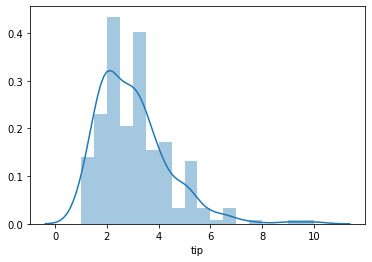

In [7]:
# Se visualiza la distribución de la variable tip (propina) con un histograma

ax = sns.distplot(tips.tip)

Por defecto se aprecia una curva que aproxima a una función de densidad de probabilidad. Si se prefiere omitir se puede utilizar el atributo **kde = False**. también se puede manipular el **color** y el número de **bins**.

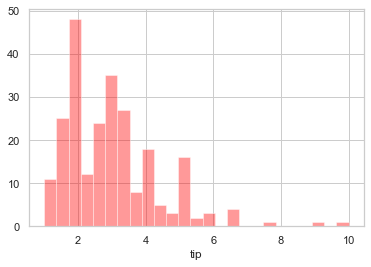

In [11]:
sns.set()
sns.set_style("whitegrid")
ax = sns.distplot(tips.tip, kde=False, color="red", bins=25)

Otra opción interesante es poder ver los histogramas en el mismo gráfico, por ejemplo para comparar la distribución de propinas en la cena versus el almuerzo. Nota: no debe parecer extraño el hecho que se use en el siguiente código tanto sns (seaborn) y plt (pyplot) para el mismo gráfico, ya que seaborn utiliza internamente matplotlib.

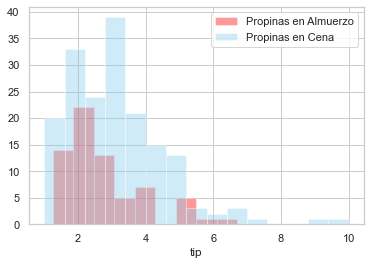

In [12]:
sns.distplot(tips[tips.time == "Lunch"].tip, kde = False,
            color="red", label="Propinas en Almuerzo")
sns.distplot(tips[tips.time == "Dinner"].tip, kde = False,
            color="skyblue", label="Propinas en Cena")
plt.legend()
plt.show()

Finalmente, se podría presentar estros histogramas uno al lado del otro.

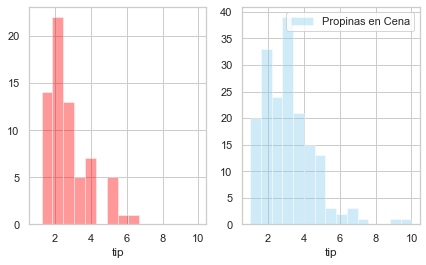

In [19]:
f, axes = plt.subplots(1,2, figsize=(7,4), sharex=True)
sns.distplot(tips[tips.time == "Lunch"].tip, kde = False,
            color="red", label="Propinas en Almuerzo", ax=axes[0])
sns.distplot(tips[tips.time == "Dinner"].tip, kde = False,
            color="skyblue", label="Propinas en Cena", ax=axes[1])
plt.legend()
plt.show()

## D. Gráfico de Caja (Boxplot)
Se realiza un gráfico de caja con la información de propinas para comparar con la información que nos muestra respecto a un histograma. Recordar que la lina dentro de la caja es la mediana.

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

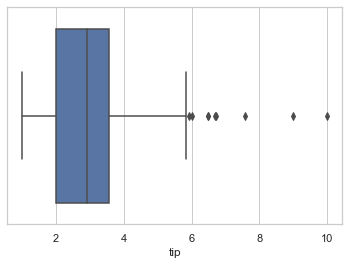

In [24]:
# Se presenta la distribución de la variable tip (propina) con un gráfico de cajas

ax = sns.boxplot(tips.tip)
tips.tip.describe()

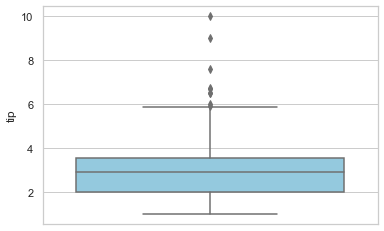

In [31]:
ax = sns.boxplot(tips.tip, orient="v", color="skyblue")

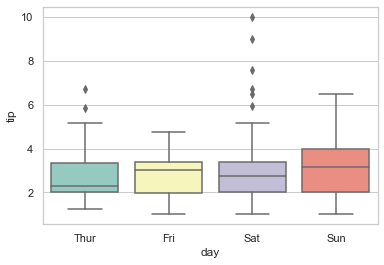

In [34]:
# Ahora se presenta según el día de la semana

sns.boxplot(x="day", y="tip", data=tips, palette="Set3")

## E. Gráfico de Violín
El gráfico de violín es similar al boxplot, pero además agrega una estimación de densidad de probabilidad para visualizar mejor la distribución de datos.

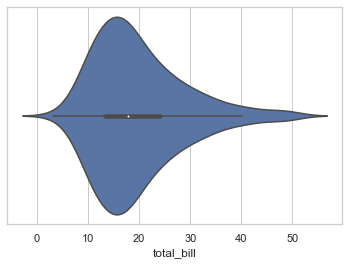

In [37]:
# Distribución de las cuentas en el restaurant con un gráfico de violín

ax = sns.violinplot(x=tips.total_bill) # or x=tips["total_bill"]

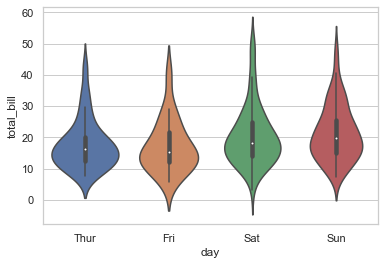

In [39]:
# Gráfico de violín por días de la semana

ax = sns.violinplot(x="day", y="total_bill", data=tips)

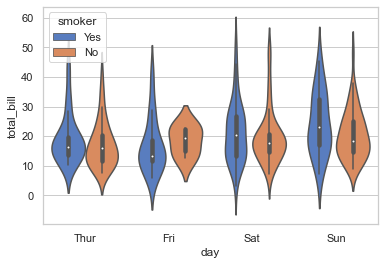

In [41]:
# Se puede seoarar estos gráficos en un segundo nivel,
# dependiendo de si la mesa es para fumadores o no

ax = sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")